In [108]:
import numpy as np
import matplotlib.pyplot as plt
import io
import glob

obj = 'Crab'
run = 'O2_1'
path_objData = '/home/m206265/lalapps_work/data/'+obj+'Data.dat'
pathMetric = '/home/m206265/lalapps_work/FstatMetric.txt'
pathTimeStampsH1 = '/home/m206265/lalapps_work/data/'+run+'_H1_tslist.txt'
pathTimeStampsL1 = '/home/m206265/lalapps_work/data/'+run+'_L1_tslist.txt'


In [109]:
file = io.BytesIO(open(pathMetric, 'rb').read().replace(b';',b','))
gFav = np.genfromtxt(file, skip_header = 40, max_rows = 3, delimiter = ',', usecols = (0,1,2)) # Metric of frequency space
print(gFav)

[[ 1.03949943e+14 -9.86745009e+19  1.28943991e+26]
 [-9.86745009e+19  1.48404767e+26 -1.74367490e+32]
 [ 1.28943991e+26 -1.74367490e+32  2.21636592e+38]]


In [110]:
TimeStampsH1 = np.genfromtxt(pathTimeStampsH1)
TimeStampsL1 = np.genfromtxt(pathTimeStampsL1)
TimeStampsL1H1 = np.concatenate((TimeStampsH1, TimeStampsL1))

Tstart = min(TimeStampsL1H1)
Tend = max(TimeStampsL1H1)
T_obs = (Tend - Tstart)+1800

 # Template grid
df = 1/T_obs  
d1f = 1/T_obs**2
d2f = 1/T_obs**3

 # Offsets
dL = 0.5*df
d1L = 0.5*d1f
d2L = 0.5*d2f


 $$ Mismatch: m(\Delta\lambda, \lambda_{sign}) = \frac{\rho^2(0) - \rho^2(\Delta\lambda)}{\rho^2(0)} $$

In [111]:
def MismMetrFun(gFav, dL, d1L, d2L):
    MismMetr = gFav[0,0]*dL**2 + gFav[0,1]*dL*d1L + gFav[0,2]*dL*d2L + gFav[1,0]*d1L*dL+ \
      + gFav[1,1]*d1L**2 + gFav[1,2]*d1L*d2L + gFav[2,0]*d2L*dL + gFav[2,1]*d2L*d1L + gFav[2,2]*d2L**2
    return(MismMetr)

def MismMetr_diagFun(gFav, dL, d1L, d2L):
    MismMetr_diag = gFav[0,0]*dL**2 + gFav[1,1]*d1L**2 + gFav[2,2]*d2L**2
    return(MismMetr_diag)

In [112]:
MismMetr = MismMetrFun(gFav, dL, d1L, d2L)
MismMetr_diag = MismMetr_diagFun(gFav, dL, d1L, d2L)

print(MismMetr)
print(MismMetr_diag)

0.6305052457211808
0.8580355888917752


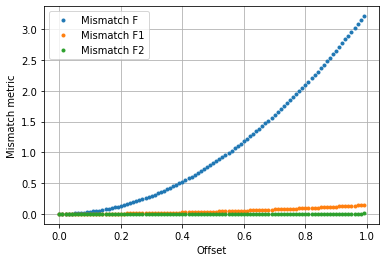

In [114]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 1, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*df, 0, 0)
ax.plot(offset, MismMetr_diagf, '.', label = 'Mismatch F')

MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*d1f, 0)
ax.plot(offset, MismMetr_diagf1, '.', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*d2f)
ax.plot(offset, MismMetr_diagf2, '.', label = 'Mismatch F2')

#ax.plot(offset, gFav[0,0]*(offset*df)**2, 'k.')

ax.set_ylabel('Mismatch metric')
ax.set_xlabel('Offset')
plt.legend()
plt.grid()
plt.show()

We want to set the grid so mismatch in df, d1f and d2f will change similarly due to number of templates

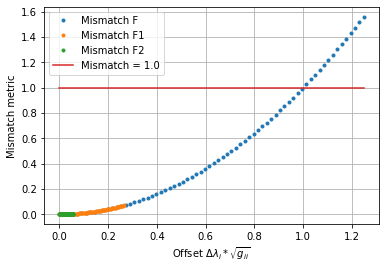

In [115]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 0.7, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*df, 0, 0)
ax.plot(offset*df*np.sqrt(gFav[0,0]), MismMetr_diagf, '.', label = 'Mismatch F')

MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*d1f, 0)
ax.plot(offset*d1f*np.sqrt(gFav[1,1]), MismMetr_diagf1, '.', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*d2f)
ax.plot(offset*np.sqrt(gFav[2,2])*d2f, MismMetr_diagf2, '.', label = 'Mismatch F2')

ax.plot(offset*df*np.sqrt(gFav[0,0]),np.ones(len(offset)), label = 'Mismatch = 1.0')
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch metric')
ax.grid()
ax.legend()
plt.show()

# Set up template grid from the metric

In [126]:
# Target total mismatch
Mmetric = 0.06
Df = 2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = 2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = 2*np.sqrt(Mmetric/3/gFav[2,2])

print('Df/df, D1f/d1f, D2f/d2f')
#print(Df, D1f, D2f)
print(Df/df, D1f/d1f, D2f/d2f)

Df/df, D1f/d1f, D2f/d2f
0.1562297511823196 0.7363475009850411 3.3932580368782825


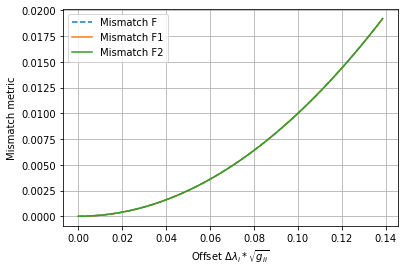

In [127]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 0.5, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*Df, 0, 0)
ax.plot(offset*Df*np.sqrt(gFav[0,0]), MismMetr_diagf, '--', label = 'Mismatch F')

MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*D1f, 0)
ax.plot(offset*D1f*np.sqrt(gFav[1,1]), MismMetr_diagf1, '-', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*D2f)
ax.plot(offset*np.sqrt(gFav[2,2])*D2f, MismMetr_diagf2, '-', label = 'Mismatch F2')

#ax.plot(offset*Df*np.sqrt(gFav[0,0]),np.ones(len(offset)))
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch metric')
ax.grid()
ax.legend()
plt.show()

In [118]:
fBand = np.sqrt(1.2/gFav[0,0])
f1Band = np.sqrt(1.2/gFav[1,1])
f2Band = np.sqrt(1.2/gFav[2,2])
mism = gFav[0,0]*(fBand)**2
print('mism=', mism)
print('fBand=', fBand, 'f1Band=', f1Band, 'f2Band=', f2Band)
print('Ntempl in f=', fBand/Df, 'Ntempl in f1d=',f1Band/D1f, 'Ntempl in f2d=', f2Band/D2f)
print('Df=', Df, 'Df1=', D1f, 'Df2=', D1f)

#SNR_perfmatched = np.genfromtxt('/home/m206265/lalapps_work/Fstat_nonoise_perfmatched.txt', comments = '%') # rho^2(0)
SNR_offsets = np.genfromtxt('/home/m206265/lalapps_work/SNR_offsets.txt',  comments = '%')

SNR = SNR_offsets[:,6]
f = SNR_offsets[:,0]
f1d = SNR_offsets[:,3]
f2d = SNR_offsets[:,4]

f0_inj = f[0]
f1d_inj = f1d[0]
f2d_inj = f2d[0]

indf0_inj = np.where(f==f0_inj)
indf1d_inj = np.where(f1d==f1d_inj)
indf2d_inj = np.where(f2d==f2d_inj)

ind_intersect = np.intersect1d(indf1d_inj, indf2d_inj)
f_fixed_inj = f[ind_intersect]


mism= 1.2
fBand= 1.0744309145329032e-07 f1Band= 8.992215309216615e-14 f2Band= 7.358171253756612e-20
Ntempl in f= 12.247448713915889 Ntempl in f1d= 12.24744871391589 Ntempl in f2d= 12.247448713915889
Df= 8.772691681591654e-09 Df1= 7.34211305494132e-15 Df2= 7.34211305494132e-15


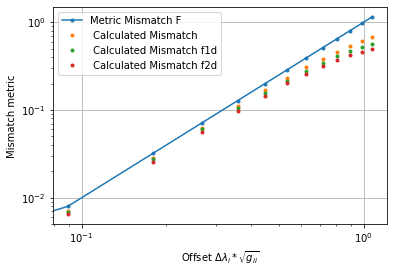

In [119]:
fig, ax = plt.subplots(1,1)
# Offset in frequency only
ind_intersect = np.intersect1d(indf1d_inj, indf2d_inj)
ind_intersectf1d = np.intersect1d(indf0_inj, indf2d_inj)
ind_intersectf2d = np.intersect1d(indf0_inj, indf1d_inj)

f_fixed_inj = f[ind_intersect]
f1d_fixed_inj = f1d[ind_intersectf1d]
f2d_fixed_inj = f2d[ind_intersectf2d]

mismatch = (SNR[0] - SNR[ind_intersect])/SNR[0]
mismatch_f1d = (SNR[0] - SNR[ind_intersectf1d])/SNR[0]
mismatch_f2d = (SNR[0] - SNR[ind_intersectf2d])/SNR[0]

offset = np.arange(0, len(ind_intersect), 1)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*Df, 0, 0)
ax.plot(offset*Df*np.sqrt(gFav[0,0]), MismMetr_diagf, '.-', label = 'Metric Mismatch F')

ax.plot((f_fixed_inj-f0_inj)*np.sqrt(gFav[0,0]), mismatch, '.', label = ' Calculated Mismatch')
ax.plot((f1d_fixed_inj-f1d_inj)*np.sqrt(gFav[1,1]), mismatch_f1d, '.', label = ' Calculated Mismatch f1d')
ax.plot((f2d_fixed_inj-f2d_inj)*np.sqrt(gFav[2,2]), mismatch_f2d, '.', label = ' Calculated Mismatch f2d')

#ax.plot(offset*Df*np.sqrt(gFav[0,0]),np.ones(len(offset)))
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch metric')
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [128]:
filenames06 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_mism06*.txt')
data06 = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames06])
filenames20 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_mism20*.txt')
data20 = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames20])
filenames01 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_mism01*.txt')
data01 = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames01])
filenames001 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_mism001*.txt')
data001 = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames001])


result06 = data06[:,[0,3,4,6]]
result01 = data01[:,[0,3,4,6]]
result20 = data20[:,[0,3,4,6]]
result001 = data001[:,[0,3,4,6]]

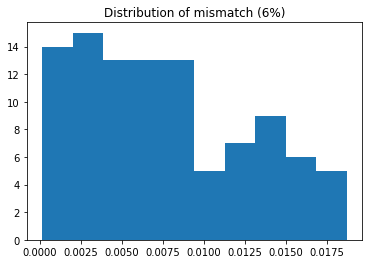

In [129]:
fig, ax1 = plt.subplots(1,1)
mismatch06 = (SNR[0] - result06[:, 3])/SNR[0]
mismatch20 = (SNR[0] - result20[:, 3])/SNR[0]
mismatch01 = (SNR[0] - result01[:, 3])/SNR[0]
mismatch001 = (SNR[0] - result001[:, 3])/SNR[0]

ax1.hist(mismatch06)
plt.title('Distribution of mismatch (6%)')
plt.show()

In [130]:
MismComp_mean06 = np.mean(mismatch06)
print('mismatch = 6%:', MismComp_mean06)
MismComp_mean20 = np.mean(mismatch20)
print('mismatch = 20%:',MismComp_mean20)
MismComp_mean01 = np.mean(mismatch01)
print('mismatch = 1%:',MismComp_mean01)
MismComp_mean001 = np.mean(mismatch001)
print('mismatch = 0.1%:',MismComp_mean001)

mismatch = 6%: 0.0076233571509210975
mismatch = 20%: 0.013928583582682261
mismatch = 1%: 0.0011540017842011593
mismatch = 0.1%: 0.00011520660029475773


0.1293871073343988


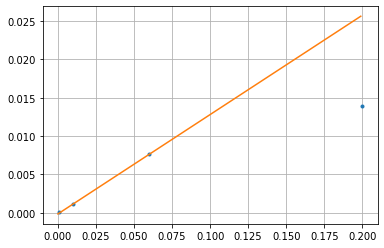

In [131]:
fig, ax = plt.subplots(1,1)
MismComp_mean = np.array([MismComp_mean001,MismComp_mean01, MismComp_mean06, MismComp_mean20])
MismTarg = np.array([0.001, 0.01, 0.06, 0.2])
incl = (MismComp_mean06-MismComp_mean01)/(0.06-0.01)
x = np.arange(0, 0.2, 0.001)

ax.plot(MismTarg,MismComp_mean, '.')
ax.plot(x, (x-0.01)*incl+MismComp_mean01)

print(incl)
plt.grid()
plt.show()

## Modified grid

Let's modify our grid and increase offsets by K times - grid will be more scarce

$
d\lambda^i (m^l_*, \tau_{obs}) = \frac{1}{K} \delta f^*_{mtr}(m^{diag}_{mtr}=m^l_*, \tau_{obs}) \\
K = \frac{\delta f}{d \lambda^i} = \frac{\sqrt{0.06}}{\sqrt{m_{meas}}}
$

In [132]:
K = np.sqrt(0.06)/np.sqrt(MismComp_mean06) # coefficient to a new grid
print(K)

dl = K*Df
d1l = K*D1f
d2l = K*D2f

print(dl)
#print(np.sqrt(MismComp_mean20)/np.sqrt(0.2))

2.8054497345054985
7.78279082163501e-08


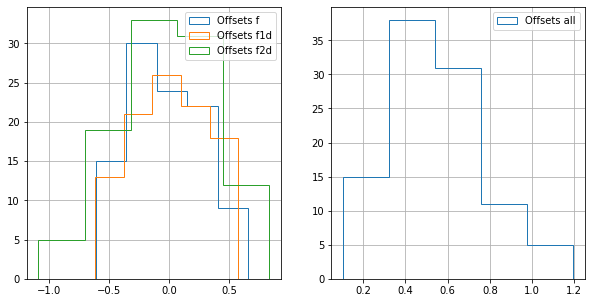

In [133]:
fig, (ax, ax2) = plt.subplots(figsize = (10,5), nrows = 1, ncols =2)

Mmetric = 0.06
Df = 2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = 2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = 2*np.sqrt(Mmetric/3/gFav[2,2])

offsets_f0 = (result06[:, 0]-f0_inj)/Df
ax.hist(offsets_f0, bins = 5, histtype = 'step', label = 'Offsets f')

offsets_f1 = (result06[:,1]-f1d_inj)/D1f
ax.hist(offsets_f1, bins = 5, histtype = 'step', label = 'Offsets f1d')

offsets_f2 = (result06[:, 2]-f2d_inj)/D2f
ax.hist(offsets_f2, bins = 5,histtype =  'step', label = 'Offsets f2d')

offsets = np.sqrt(offsets_f0**2+offsets_f1**2+offsets_f2**2)
ax2.hist(offsets, bins = 5, histtype = 'step', label = 'Offsets all')

ax.legend()
ax2.legend()
ax.grid()
ax2.grid()
plt.show()
#print(result06[:, 0])
#print(offsets)

In [134]:
K = np.sqrt(0.06)/np.sqrt(MismComp_mean06) # coefficient to a new grid
print(K)

dl = K*Df
d1l = K*D1f
d2l = K*D2f

2.8054497345054985


In [135]:
filenames06_modif = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_modif06*.txt')
data06_modif = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames06_modif])

result06_modif = data06_modif[:,[0,3,4,6]]
mismatch06_modif = (SNR[0] - result06_modif[:, 3])/SNR[0]
MismComp_mean06_modif = np.mean(mismatch06_modif)

print('mismatch_modif = 6%:', MismComp_mean06_modif)

mismatch_modif = 6%: 0.05700292694561476


(array([ 4.,  6., 16., 23., 17.,  8., 12.,  2., 10.,  2.]),
 array([0.07058446, 0.18517991, 0.29977537, 0.41437082, 0.52896628,
        0.64356174, 0.75815719, 0.87275265, 0.9873481 , 1.10194356,
        1.21653902]),
 <BarContainer object of 10 artists>)

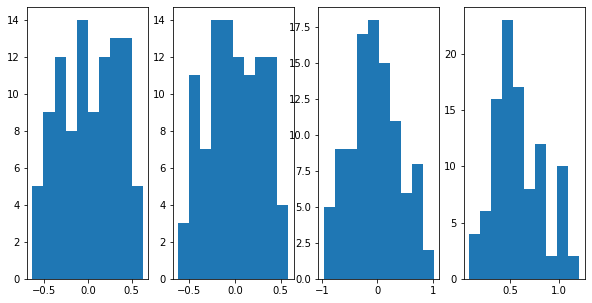

In [136]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (10,5), nrows = 1, ncols =4)

Mmetric = 0.06
Df = K*2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = K*2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = K*2*np.sqrt(Mmetric/3/gFav[2,2])

offsets_f0 = (result06_modif[:, 0]-f0_inj)/Df
ax1.hist(offsets_f0)

offsets_f1 = (result06_modif[:,1]-f1d_inj)/D1f
ax2.hist(offsets_f1)

offsets_f2 = (result06_modif[:, 2]-f2d_inj)/D2f
ax3.hist(offsets_f2)

offsets = np.sqrt(offsets_f0**2+offsets_f1**2+offsets_f2**2)
ax4.hist(offsets)

In [138]:
filenames06_Noise = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid_Noise/SNR_GridLoud_mism06*.txt')
data06_Noise = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames06_Noise])

result06_Noise = data06_Noise[:,[0,3,4,6]]
mismatch06_Noise = (SNR[0] - result06_Noise[:, 3] + 4)/(SNR[0]) # k + lambda, k - deg of freedom, lambda - noncentrality parameter
MismComp_mean06_Noise = np.mean(mismatch06_Noise)
print('mismatch_Noise = 6%:', MismComp_mean06_Noise)
print(result06_Noise[:, 3])

mismatch_Noise = 6%: -0.05943474574303207
[107.333252  115.193001   96.9743881  65.9176788 129.13327   107.038429
  98.9952087 111.927208   73.4296494  95.1639252  90.5259018  95.2131348
  69.4169464  76.0148773  97.5424957  68.8174515  95.0784531  90.3842773
  94.9577484  98.9595718  83.323555  103.862366   84.7441025  58.4006996
  93.0575714  94.003273  130.450424   71.0640488 125.262871   78.1159973
  90.2062149  88.4457626  57.042881   72.2505875  71.0190125 118.87365
  76.7682495  86.0642776  96.0885773  70.3680267 109.217255   87.2248764
  73.5551834 112.379768  126.349396   80.7598572  91.3516922  84.617897
  73.481781   92.7082138  65.0238724  78.0619354  90.5839005  78.7819824
  82.4638901  63.4259949  67.3835144  77.5546417  65.0833282  72.3670044
  92.169632   81.8594742  76.9801331  85.938942   84.1062088 118.216988
  56.2842674  62.5207291  66.2751083 106.929901   87.3017731  88.1470184
  90.8227081 100.292587   92.4549484 108.380661   93.7457352  64.8438721
  38.5651779  